In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_pokemon = pd.read_csv('/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 10/pokemon_data.csv')
df_pokemon.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."


In [7]:
x = df_pokemon[['height']].values
y = df_pokemon[['weight']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (1041, 1), x_test: (261, 1), y_train: (1041, 1), y_test: (261, 1)


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print(f"Coefficients: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")
print(f"Score: {model.score(x_test, y_test)}")

Coefficients: 31.757172547475832
Intercept: 356.7355635170795
Score: -0.5986509379660025


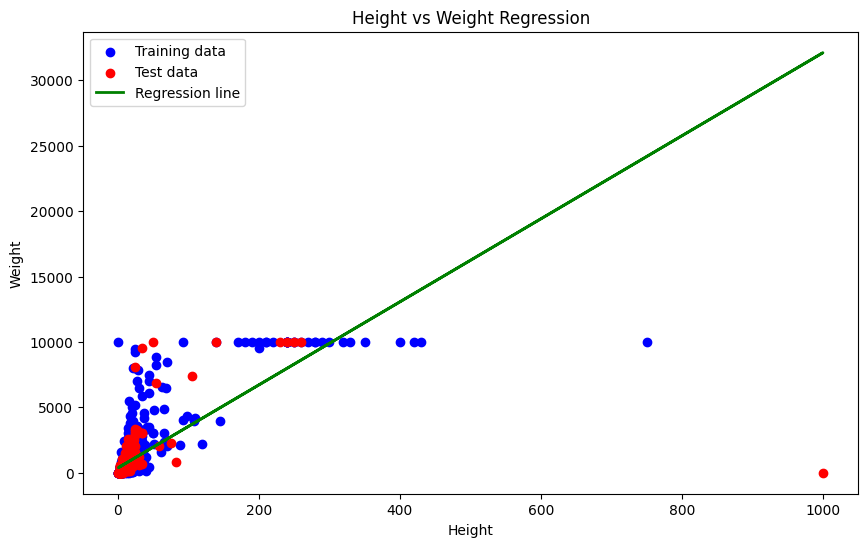

In [11]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x_test, model.predict(x_test), color='green', linewidth=2, label='Regression line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight Regression')
plt.legend()
plt.show()